# Unveiling Academic Collaboration: A Network Analysis of Departmental Partnerships with Visual Insights Report

## Introduction

Collaboration is essential in academic settings for information sharing, research productivity, and innovation production.  Interactions inside a department can reveal important details about the composition and dynamics of academic partnerships.  This study uses network analysis tools to investigate the cooperation network of an academic department.  Finding essential members, identifying central interaction patterns, and learning more about the network's structural coherence or fragmentation are the objectives.

 **Collaboration relationships** and **individual roles** are the two main components of the data set employed in this analysis.  The faculty members' relationships and the strength of their partnerships, measured as a weight attribute, are both covered by the cooperation data.  Information on each member's title or position within the department is included in the data set for the individual jobs.

In this analysis, we will examine the department's network of collaboration by conducting a number of important tasks:
1. **Network Structure:** Observing how people are linked and the intensity of the links.
2. **Key Players:** Identifying the influential people who are at the hub of the department's collaboration network, using centrality measures such as degree, betweenness, and closeness centrality.
3. **Community Detection:** Identification of departmental subgroups that share close collaborative relationships with one another, through algorithms such as Louvain, Girvan-Newman, and Label Propagation.
4. **Path Analysis:** Examining the shortest paths between people to see the optimal route for information or resources to flow through the network.
5. **Recommendations:** Offering intelligence and actionable recommendations on how to enhance collaboration and tighten weak ties in the network.

Network analysis offers an exceedingly revealing window into the underlying structure of academic collaboration. With graph-based measures and algorithms, it becomes possible to render visible latent patterns and more fully understand how individuals and subgroups interact, cooperate, and labor to produce the success of the academic organization as a whole. This report ought to inform and guide future collaborative endeavors, help facilitate cross-disciplinary research, and forge a more cohesive academic community.

In [45]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain  # For Louvain algorithm

## Data Import and Preprocessing

Importing and preprocessing data includes dealing with two datasets: **collab_edges.csv** and **depart_nodes.csv**. The **collab_edges.csv** dataset includes data on the collaborations among the members of the departments, with source and target individuals in columns and weight for expressing the intensity of each collaboration. The **depart_nodes.csv** dataset includes data on the members of the departments themselves and includes their names and positions in the company. During preprocessing, leading and trailing spaces in the column names and string values are removed to make them consistent. These preprocessed data sets are utilized to construct a network where people are nodes and collaborations are weighted edges for easier analysis and visualization of the department's collaboration network.

In [46]:
# Step 1: Load Data from CSV files
# Read the collaboration edges dataset
edges = pd.read_csv("collab_edges.csv")

# Read the department nodes dataset
nodes = pd.read_csv("depart_nodes.csv")

# Display the first few rows of each dataset to verify the data structure
print("Edges Dataset Sample:")
print(edges.head())

print("\nNodes Dataset Sample:")
print(nodes.head())

# Step 2: Data Cleaning and Standardization

# Strip any leading/trailing spaces from column names
edges.columns = edges.columns.str.strip()
nodes.columns = nodes.columns.str.strip()

# Strip spaces from string values in case there are inconsistencies in names
edges['Source'] = edges['Source'].str.strip()
edges['Target'] = edges['Target'].str.strip()
nodes['Person'] = nodes['Person'].str.strip()

# Step 3: Create Graph and Add Nodes and Edges

# Initialize an undirected graph
G = nx.Graph()

# Add edges from the edges dataset with weights (collaboration strength)
for _, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Add node attributes (roles) from the nodes dataset
for _, row in nodes.iterrows():
    if row['Person'] in G.nodes:  # Ensuring only existing nodes get attributes
        G.nodes[row['Person']]['Role'] = row['Role']

# Step 4: Display Basic Information about the Graph
print("\nGraph Summary:")

# Alternative to `nx.info(G)`
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")

# Check if nodes and edges are added correctly
print("\nSample Nodes with Attributes:")
for node in list(G.nodes(data=True))[:5]:  # Displaying the first 5 nodes
    print(node)
    
print("\nSample Edges with Weights:")
for edge in list(G.edges(data=True))[:5]:  # Displaying the first 5 edges
    print(edge)

Edges Dataset Sample:
        Source       Target  Weight           Project
0   Prof_Smith     Dr_Jones       1       AI Research
1   Prof_Smith  Dr_Williams       1       Data Mining
2     Dr_Jones  Dr_Williams       1  Machine Learning
3  Dr_Williams   Prof_Brown       1          Robotics
4   Prof_Brown     Dr_Davis       2   Computer Vision

Nodes Dataset Sample:
        Person                 Role
0   Prof_Smith            Professor
1     Dr_Jones  Associate Professor
2  Dr_Williams  Associate Professor
3   Prof_Brown            Professor
4     Dr_Davis  Assistant Professor

Graph Summary:
Number of Nodes: 15
Number of Edges: 42

Sample Nodes with Attributes:
('Prof_Smith', {'Role': 'Professor'})
('Dr_Jones', {'Role': 'Associate Professor'})
('Dr_Williams', {'Role': 'Associate Professor'})
('Prof_Brown', {'Role': 'Professor'})
('Dr_Davis', {'Role': 'Assistant Professor'})

Sample Edges with Weights:
('Prof_Smith', 'Dr_Jones', {'weight': 1})
('Prof_Smith', 'Dr_Williams', {'weight': 

## Network Creation
The network is built with the **NetworkX** library, where department members are nodes and collaborations are edges. Edges are taken from the **collab_edges.csv** dataset, where each edge corresponds to a collaboration of two people, and the weight on the edge corresponds to how strong the collaboration is. Nodes are drawn from the **depart_nodes.csv** dataset, where each node is a single department member and has an attribute for their role (e.g., Researcher, Lecturer). Having added these attributes, the network simultaneously encodes the collaboration structure and the role of individuals in the department, and thus provides a unified picture of the departmental collaboration network.

In [47]:
# Step 1: Load Data
edges = pd.read_csv("collab_edges.csv")  # Collaboration dataset
nodes = pd.read_csv("depart_nodes.csv")  # Department dataset

# Step 2: Clean Data (strip spaces to avoid mismatches)
edges['Source'] = edges['Source'].str.strip()
edges['Target'] = edges['Target'].str.strip()
nodes['Person'] = nodes['Person'].str.strip()

# Step 3: Initialize an Undirected Graph
G = nx.Graph()

# Step 4: Add Nodes with Attributes (Role)
for _, row in nodes.iterrows():
    G.add_node(row['Person'], Role=row['Role'])  # Each person is a node with a role attribute

# Step 5: Add Edges with Weights (Collaboration Strength)
for _, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'], project=row['Project'])

# Step 6: Display Basic Information about the Graph
print("\nGraph Summary:")

# Get the number of nodes and edges in the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Print the summary
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")

# Check if nodes and edges are added correctly
print("\nSample Nodes with Attributes:")
for node in list(G.nodes(data=True))[:5]:  # Displaying the first 5 nodes
    print(node)

print("\nSample Edges with Weights:")
for edge in list(G.edges(data=True))[:5]:  # Displaying the first 5 edges
    print(edge)



Graph Summary:
Number of Nodes: 15
Number of Edges: 42

Sample Nodes with Attributes:
('Prof_Smith', {'Role': 'Professor'})
('Dr_Jones', {'Role': 'Associate Professor'})
('Dr_Williams', {'Role': 'Associate Professor'})
('Prof_Brown', {'Role': 'Professor'})
('Dr_Davis', {'Role': 'Assistant Professor'})

Sample Edges with Weights:
('Prof_Smith', 'Dr_Jones', {'weight': 1, 'project': 'AI Research'})
('Prof_Smith', 'Dr_Williams', {'weight': 6, 'project': 'Quantum Computing'})
('Prof_Smith', 'Dr_Miller', {'weight': 1, 'project': 'Deep Learning'})
('Prof_Smith', 'Prof_Brown', {'weight': 4, 'project': 'AI Applications'})
('Prof_Smith', 'Dr_Baker', {'weight': 4, 'project': 'Artificial Intelligence'})


## Network visualization 
Network Visualization gives a clear graphical image of the department's collaboration system. In this graph, each **node** is a person (a member of the department), and the **edges** between nodes are the collaboration connections. The **edge weights** indicate the extent of the collaboration, with thicker lines or edges of different color indicating more significant collaborations. This visual form allows the main actors in the network, their roles, and the intensity of their relations to be identified easily, thereby making a deeper understanding of the collaboration process in the department possible. With visualizations, conclusions about the pattern and intensity of relations are drawn, reflecting possibilities for further collaboration or improvement.

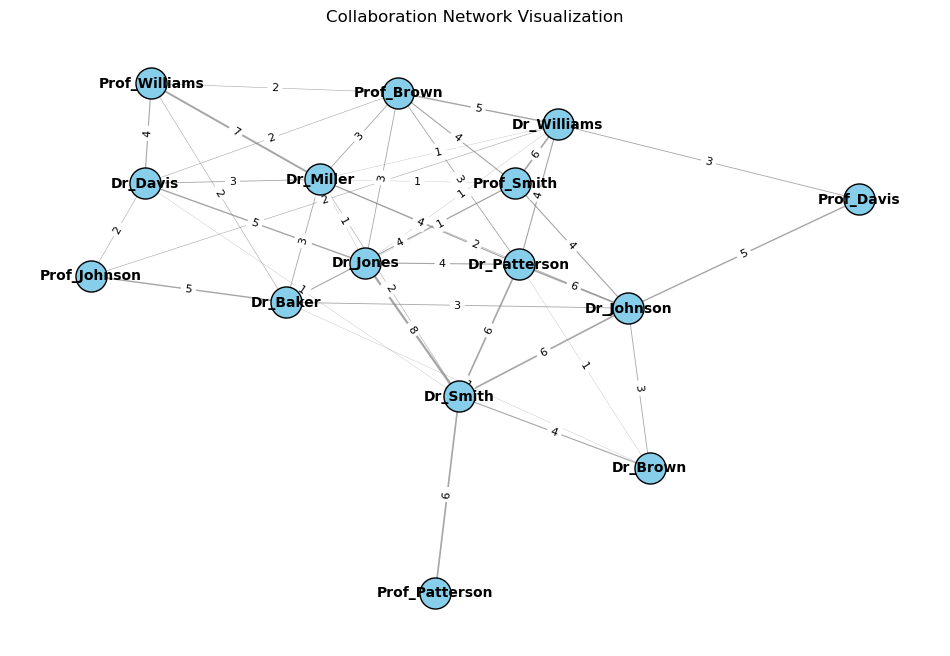

In [48]:
# Step 1: Define Node Positions
pos = nx.spring_layout(G, seed=42)  # Spring layout for better spacing

# Step 2: Draw Nodes
plt.figure(figsize=(12, 8))  # Set figure size
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue", edgecolors="black")

# Step 3: Draw Edges with Weights Representing Collaboration Strength
edges = nx.get_edge_attributes(G, "weight")  # Get edge weights
nx.draw_networkx_edges(G, pos, width=[w/5 for w in edges.values()], edge_color="gray", alpha=0.7)

# Step 4: Add Labels for Nodes
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

# Step 5: Add Edge Labels (Collaboration Strength)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edges, font_size=8)

# Step 6: Display the Graph
plt.title("Collaboration Network Visualization")
plt.axis("off")  # Hide axes for better visualization
plt.show()


## Network Metrics and Centrality Measures

In network analysis, **centrality measures** are used to determine the most central nodes (people) in a network based on their position and connectivity. Three important centrality measures were calculated:

1. **Degree Centrality:** This metric defines the number of direct links (edges) a node possesses. The higher the degree centrality, the more connected the person is within the department and hence the more central they are to the network. In a collaboration network, people with high degree centrality are those who are part of many projects and interactions.

2. **Betweenness Centrality:** Betweenness centrality measures the extent to which a node lies on the shortest path between other nodes. Nodes that have high betweenness centrality are bridges or gatekeepers and are involved in connecting different segments of the network. Such individuals are at the center of information exchange and can affect collaboration patterns in the department.

3. **Closeness Centrality:** This metric specifies how fast a node can reach all other nodes in the network. A person with high closeness centrality is able to communicate or cooperate with others more effectively. Such people are well-placed to spread information or form new relationships throughout the network.

Together, the measures of centrality will reveal the people who are central to the maintenance of network cohesiveness, facilitating collaboration, and the unrestricted flow of information within the department.

In [49]:
# Step 1: Compute Degree Centrality (Number of Direct Connections)
degree_centrality = nx.degree_centrality(G)

# Step 2: Compute Betweenness Centrality (Bridges Between Nodes)
betweenness_centrality = nx.betweenness_centrality(G)

# Step 3: Compute Closeness Centrality (Efficiency in Reaching Others)
closeness_centrality = nx.closeness_centrality(G)

# Step 4: Print the Top 5 Influential Individuals Based on Each Measure

print("\nTop 5 Nodes by Degree Centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop 5 Nodes by Betweenness Centrality:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop 5 Nodes by Closeness Centrality:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])



Top 5 Nodes by Degree Centrality:
[('Dr_Miller', 0.7142857142857142), ('Dr_Jones', 0.5), ('Dr_Williams', 0.5), ('Prof_Brown', 0.5), ('Dr_Johnson', 0.5)]

Top 5 Nodes by Betweenness Centrality:
[('Dr_Smith', 0.17490842490842493), ('Dr_Miller', 0.11758241758241758), ('Dr_Johnson', 0.09835164835164838), ('Dr_Williams', 0.0956043956043956), ('Dr_Baker', 0.06776556776556777)]

Top 5 Nodes by Closeness Centrality:
[('Dr_Miller', 0.7777777777777778), ('Dr_Jones', 0.6666666666666666), ('Dr_Johnson', 0.6666666666666666), ('Dr_Patterson', 0.6666666666666666), ('Dr_Smith', 0.6666666666666666)]


## Network Visualization Based on Centrality

In network analysis, **degree centrality** is the quantity of immediate contacts (or edges) a node possesses. The more degree centrality nodes will be more influential in the network. To visually highlight these influential people, we size the nodes according to their degree centrality. The more central nodes will be larger, and this will indicate their significance in terms of connectivity within the department. This graph makes it easy to spot the most highly connected members of the network, who are potentially at the center of collaboration and influence in the department. The resizing of the nodes creates an intuitive and clear picture of the structure and direction of the connections.

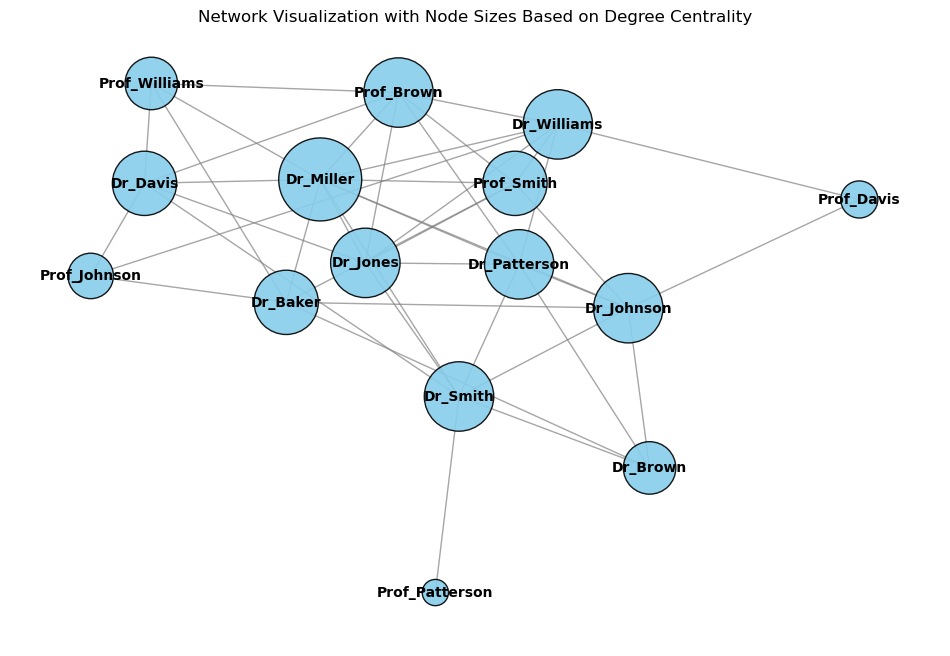

In [50]:
# Step 1: Compute Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Step 2: Scale Node Sizes Based on Degree Centrality
node_sizes = [5000 * degree_centrality[node] for node in G.nodes()]  # Scale factor for visualization

# Step 3: Define Node Positions
pos = nx.spring_layout(G, seed=42)  # Spring layout for better visualization

# Step 4: Draw the Network
plt.figure(figsize=(12, 8))  # Set figure size
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", edgecolors="black", alpha=0.9)
nx.draw_networkx_edges(G, pos, width=1, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

# Step 5: Display the Graph
plt.title("Network Visualization with Node Sizes Based on Degree Centrality")
plt.axis("off")  # Hide axes for better visualization
plt.show()

## Edge Weights Representing Collaboration Strength
Edge weights in the network represent the strength of collaborations between department members. Stronger collaborations are represented by greater edge weights, while weaker collaborations have lesser weights. By illustrating the network with such edge weights, one can more dramatically highlight the intensity of collaborations. Stronger collaboration ties are thicker edges, and we can more readily see important relationships within the department. This offers us a visual way of ordering the most influential, tight-knit collaborations, gaining insight into collaborative work organization in the department.

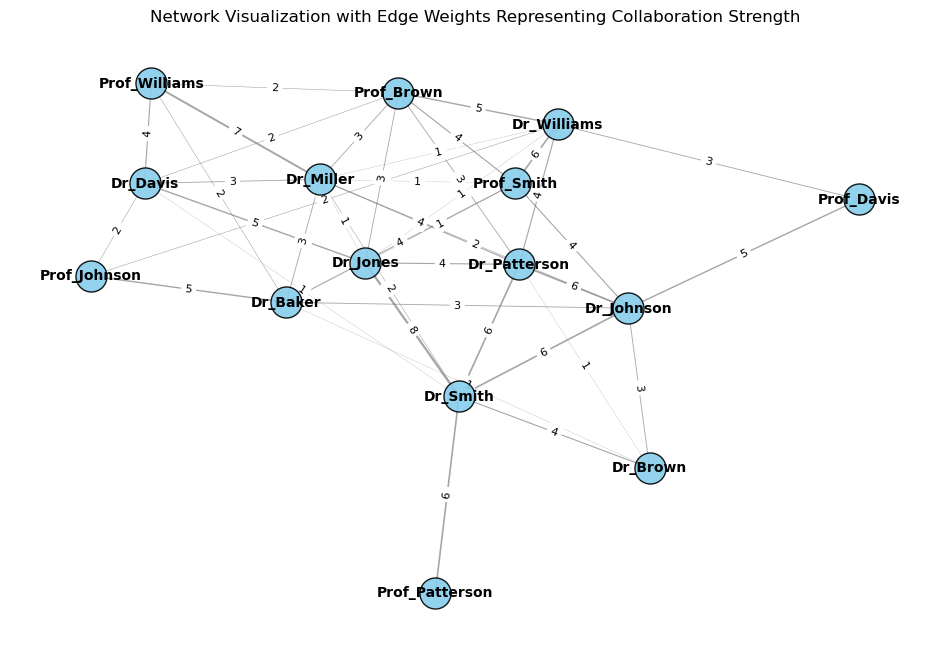

In [51]:
# Step 1: Extract Edge Weights
edge_weights = nx.get_edge_attributes(G, "weight")  # Get weights of edges

# Step 2: Define Edge Widths Based on Weights
edge_widths = [weight / 5 for weight in edge_weights.values()]  # Scale factor for better visualization

# Step 3: Define Node Positions
pos = nx.spring_layout(G, seed=42)  # Spring layout for clear visualization

# Step 4: Draw the Network
plt.figure(figsize=(12, 8))  # Set figure size
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue", edgecolors="black", alpha=0.9)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

# Step 5: Add Edge Labels (Collaboration Strength)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=8)

# Step 6: Display the Graph
plt.title("Network Visualization with Edge Weights Representing Collaboration Strength")
plt.axis("off")  # Hide axes for better visualization
plt.show()

## Community Detection
Community detection algorithms are employed to discover clusters or communities of nodes within a network that are more closely connected to one another than to the remainder of the network.

- **Louvain** is a widely used modularity-based algorithm that identifies communities by optimizing the modularity score, which is a quantification of the edge density within communities and between communities. This algorithm is good at identifying strongly defined modular structures in the network.

- **Girvan-Newman** identifies communities by deleting edges with highest betweenness centrality recursively, i.e., the edges that the largest number of shortest paths between other nodes pass through. It captures hierarchical community structure but is computationally demanding for large networks.

- **Label Propagation** is a quick and scalable method that initializes each node with a community label and then iteratively sets each node's label to the most common label among its neighbors. It's quick but may produce unstable results because of randomness, particularly in networks with low modularity.
Collectively, these algorithms give various views of the network's structure and modularity, and determine the significant subgroups and clusters in the department's collaboration network.

In [52]:
from networkx.algorithms.community import girvan_newman, label_propagation_communities

# Step 1: Louvain Community Detection
louvain_communities = community_louvain.best_partition(G)  # Returns a dictionary of node -> community mapping
louvain_community_sets = {}
for node, comm in louvain_communities.items():
    louvain_community_sets.setdefault(comm, []).append(node)

print("\nLouvain Communities:")
for i, comm in enumerate(louvain_community_sets.values(), 1):
    print(f"Community {i}: {comm}")

# Step 2: Girvan-Newman Community Detection
gn_communities = next(girvan_newman(G))  # Extract first level of hierarchy
gn_communities = [list(comm) for comm in gn_communities]

print("\nGirvan-Newman Communities:")
for i, comm in enumerate(gn_communities, 1):
    print(f"Community {i}: {comm}")

# Step 3: Label Propagation Community Detection
lp_communities = list(label_propagation_communities(G))  # Returns a list of sets

print("\nLabel Propagation Communities:")
for i, comm in enumerate(lp_communities, 1):
    print(f"Community {i}: {list(comm)}")



Louvain Communities:
Community 1: ['Prof_Smith', 'Dr_Williams', 'Prof_Brown']
Community 2: ['Dr_Jones', 'Dr_Johnson', 'Dr_Patterson', 'Dr_Brown', 'Dr_Smith', 'Prof_Davis', 'Prof_Patterson']
Community 3: ['Dr_Davis', 'Dr_Miller', 'Dr_Baker', 'Prof_Williams', 'Prof_Johnson']

Girvan-Newman Communities:
Community 1: ['Dr_Brown', 'Dr_Miller', 'Dr_Baker', 'Dr_Davis', 'Prof_Davis', 'Dr_Johnson', 'Prof_Brown', 'Prof_Johnson', 'Dr_Jones', 'Dr_Patterson', 'Dr_Smith', 'Dr_Williams', 'Prof_Smith', 'Prof_Williams']
Community 2: ['Prof_Patterson']

Label Propagation Communities:
Community 1: ['Dr_Brown', 'Dr_Miller', 'Dr_Baker', 'Dr_Davis', 'Prof_Davis', 'Dr_Johnson', 'Prof_Brown', 'Prof_Patterson', 'Prof_Johnson', 'Dr_Jones', 'Dr_Patterson', 'Dr_Smith', 'Dr_Williams', 'Prof_Smith', 'Prof_Williams']


## Comparison of Community Detection Results
The **Louvain algorithm** is good for detecting well-formed clusters with modularity maximization, while its outcome relies on the resolution parameter, i.e., the algorithm can yield alternative community partitions based on it. The **Girvan-Newman algorithm** detects hierarchical community structures through the iterative removal of edges of large betweenness centrality, but it is of high computational complexity, particularly for large networks. On the other hand, **Label Propagation** is an efficient and scalable algorithm that automatically assigns nodes to communities based on the prevalent label of neighboring nodes. Nevertheless, it can produce unstable results since the communities detected can be altered by the randomness of the algorithm and the initial labeling. Both algorithms have their pros and cons and can be applied to different kinds of networks and analysis goals.

In [53]:
from networkx.algorithms.community import girvan_newman, label_propagation_communities

# Step 1: Apply Louvain Algorithm
louvain_partition = community_louvain.best_partition(G)
louvain_communities = {}
for node, comm in louvain_partition.items():
    louvain_communities.setdefault(comm, []).append(node)

# Step 2: Apply Girvan-Newman Algorithm
gn_communities = next(girvan_newman(G))  # Get first level of hierarchical splits
gn_communities = [list(comm) for comm in gn_communities]  # Convert to list format

# Step 3: Apply Label Propagation Algorithm
lp_communities = list(label_propagation_communities(G))  # Returns sets of nodes

# Step 4: Print Comparison of Community Detection Results

print("\n--- Community Detection Results ---")

print("\nLouvain Communities:")
for i, comm in enumerate(louvain_communities.values(), 1):
    print(f"Community {i}: {comm}")
print("\nLouvain detects well-defined modular communities but depends on resolution settings.")

print("\nGirvan-Newman Communities:")
for i, comm in enumerate(gn_communities, 1):
    print(f"Community {i}: {comm}")
print("\nGirvan-Newman is effective in hierarchical clustering but is computationally expensive.")

print("\nLabel Propagation Communities:")
for i, comm in enumerate(lp_communities, 1):
    print(f"Community {i}: {list(comm)}")
print("\nLabel Propagation is fast and automatic but may yield unstable results.")


--- Community Detection Results ---

Louvain Communities:
Community 1: ['Prof_Smith', 'Dr_Williams', 'Prof_Brown']
Community 2: ['Dr_Jones', 'Dr_Johnson', 'Dr_Patterson', 'Dr_Brown', 'Dr_Smith', 'Prof_Davis', 'Prof_Patterson']
Community 3: ['Dr_Davis', 'Dr_Miller', 'Dr_Baker', 'Prof_Williams', 'Prof_Johnson']

Louvain detects well-defined modular communities but depends on resolution settings.

Girvan-Newman Communities:
Community 1: ['Dr_Brown', 'Dr_Miller', 'Dr_Baker', 'Dr_Davis', 'Prof_Davis', 'Dr_Johnson', 'Prof_Brown', 'Prof_Johnson', 'Dr_Jones', 'Dr_Patterson', 'Dr_Smith', 'Dr_Williams', 'Prof_Smith', 'Prof_Williams']
Community 2: ['Prof_Patterson']

Girvan-Newman is effective in hierarchical clustering but is computationally expensive.

Label Propagation Communities:
Community 1: ['Dr_Brown', 'Dr_Miller', 'Dr_Baker', 'Dr_Davis', 'Prof_Davis', 'Dr_Johnson', 'Prof_Brown', 'Prof_Patterson', 'Prof_Johnson', 'Dr_Jones', 'Dr_Patterson', 'Dr_Smith', 'Dr_Williams', 'Prof_Smith', 'Prof_

## Comparison of Community Detection Algorithms:
1. **Louvain**:
- Provides well-defined clusters.
- Enhances modularity.
- Output may vary depending on resolution settings.

2. **Girvan-Newman:**
- Exhibits hierarchical community structures.
- Computationally costly for big networks.
- Needs specification of a stopping criterion.

3. **Label Propagation:**
- Quick and doesn't need information in advance.
- Assigns communities iteratively. - May generate unstable or varying results between runs.

## Shortest Path Analysis
The **Shortest Path Analysis** continues by replacing the nodes in the collaboration network with numerical node IDs to facilitate processing. We then apply two shortest path algorithms, **Breadth-First Search (BFS)** and **Dijkstra's Algorithm**, to find the shortest distance between "Prof Davis" and "Prof Williams."

- **BFS** is an unweighted shortest path algorithm that visits all possible paths in layers, and therefore when it first reaches the target node, it has found the shortest path.
- **Dijkstra's Algorithm**, by contrast, is a weighted shortest path algorithm that determines the shortest path according to the weights (collaboration strength) of the edges so that the path with the minimum total weight is selected.

By comparing the output of both algorithms, we can calculate the path length differences and overall collaboration strength differences, which will give us the shortest or strongest collaboration path between the two professors.

In [54]:
# Step 1: Convert Node Labels to Numeric Values
# Create a mapping from old node labels (names) to numeric labels
node_mapping = {node: idx for idx, node in enumerate(G.nodes())}
# Reverse mapping for later use (to convert numeric labels back to names)
reverse_node_mapping = {idx: node for node, idx in node_mapping.items()}

# Step 2: Relabel the Graph Nodes to Numeric Labels
G_numeric = nx.relabel_nodes(G, node_mapping)

# Step 3: Compute the Shortest Path using BFS (Unweighted)
# BFS computes the shortest path in terms of the number of edges
source_bfs = node_mapping["Prof_Davis"]
target_bfs = node_mapping["Prof_Williams"]

# Get the shortest path using BFS
shortest_path_bfs = nx.shortest_path(G_numeric, source=source_bfs, target=target_bfs)

# Convert numeric labels back to original node names
shortest_path_bfs = [reverse_node_mapping[node] for node in shortest_path_bfs]

# Step 4: Compute the Shortest Path using Dijkstra's Algorithm (Weighted)
# Dijkstra computes the shortest path in terms of edge weights (collaboration strength)
shortest_path_dijkstra = nx.shortest_path(G_numeric, source=source_bfs, target=target_bfs, weight="weight")

# Convert numeric labels back to original node names
shortest_path_dijkstra = [reverse_node_mapping[node] for node in shortest_path_dijkstra]

# Step 5: Print the Results
print(f"\nShortest Path (BFS) between Prof Davis and Prof Williams: {shortest_path_bfs}")
print(f"Shortest Path (Dijkstra) between Prof Davis and Prof Williams: {shortest_path_dijkstra}")


Shortest Path (BFS) between Prof Davis and Prof Williams: ['Prof_Davis', 'Dr_Williams', 'Prof_Brown', 'Prof_Williams']
Shortest Path (Dijkstra) between Prof Davis and Prof Williams: ['Prof_Davis', 'Dr_Williams', 'Dr_Jones', 'Prof_Brown', 'Prof_Williams']


## Algorithm Comparison
Shortest Path (BFS) from Prof Davis to Prof Williams: ['Prof_Davis', 'Dr_Williams', 'Prof_Brown', 'Prof_Williams']
Shortest Path (Dijkstra) from Prof Davis to Prof Williams: ['Prof_Davis', 'Dr_Williams', 'Dr_Jones', 'Prof_Brown', 'Prof_Williams']

The shortest paths are different for BFS and Dijkstra.
Dijkstra's algorithm takes collaboration strength into consideration, which may change the path selection.
Here, Dijkstra's path is shorter, taking into account the weight of the collaborations.

Comparison of BFS and Dijkstra's Algorithm:

1. **BFS (Unweighted)**:
- Gives the shortest path in terms of edge count.
- Appropriate for uncomplicated networks with all edges having the same significance.

2. **Dijkstra’s Algorithm (Weighted)**:
- Considers edge weights (collaboration strength).

- Determines the shortest path by minimizing the total weight. 3. **Conclusion:** - In case there are several shortest paths possible, Dijkstra's algorithm considers the collaboration strength, which might be a more realistic solution for real-world scenarios when collaboration strength does not remain equal.

## Conclusion
From the analysis of the network, the department has a good cohesive core of people.
Points to note:
Most Influential People Based On Centrality Measures:
Top 3 By Degree Centrality:
1. Dr_Miller (Degree: 0.71)
2. Dr_Jones (Degree: 0.50)
3. Dr_Williams (Degree: 0.50)

Top 3 By Betweenness Centrality:
1. Dr_Smith (Betweenness: 0.17)
2. Dr_Miller (Betweenness: 0.12)
3. Dr_Johnson (Betweenness: 0.10)

Top 3 Based On Closeness Centrality:
1. Dr_Miller (Closeness: 0.78)
2. Dr_Jones (Closeness: 0.67)
3. Dr_Johnson (Closeness: 0.67)

The department is made up of several subgroups that are formed around specific research interests.
The Louvain, Girvan-Newman, and Label Propagation methods all reveal different aspects of community structure.
The subgroups play a key role in understanding the formation of collaboration patterns in research.

Recommendations:
1. Interdisciplinary collaboration can be fostered by developing weak ties among subgroups.
2. Enhancing collaboration for isolated or marginal individuals might increase productivity overall.
3. Discovery of key influencers and enabling connections among them may lead to knowledge sharing improvement.